# Exploring Corona virus Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('mesumraza/corona-virus-pakistan-dataset-2020')

In [3]:
from zipfile import ZipFile 
zf = ZipFile('corona-virus-pakistan-dataset-2020.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [4]:
covid_data=pd.ExcelFile('COVID_FINAL_DATA.xlsx')
covid_data.sheet_names

['TimeSeries_KeyIndicators',
 'TimeSeries_KeyIndicators_Detail',
 'TimeSeries_Action_Screen',
 'TimeSeries_Action_Call',
 'TimeSeries_COVID_News',
 'TimeSeries_NIH_Response',
 'TimeSeries_NIH_Risk',
 'TimeSeries_Province_Response',
 'TimeSeries_Helpline_Calls',
 'TimeSeries_Quarantine_Details']

**Cleaning Sheet1**

In [5]:
sheet1=covid_data.parse('TimeSeries_KeyIndicators')  #Opening  first sheet
#print(df1.columns) 
sheet1.head()


,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [6]:
sheet1.shape

(454, 12)

In [7]:
sheet1.rename(columns={'Cumulative':'Cases','Discharged':'Recovered','Still admitted':'Hospitalized','Cumulative  Test positive':'Confirmed','New  (last 24 hrs)':'New_cases','Cumulative  tests performed':'Total_tests','Tests  performed in last 24 hours':'New_tests','Expired':'Dead','Home Quarantine':'Home_quarantine'},inplace=True)
sheet1.head()

,Unnamed: 0,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [8]:
sheet1.loc[sheet1['Unnamed: 0']==5] #query based on assigned indexes but doesn't define uniquely row

,Unnamed: 0,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
9,5,67,0,105,2020-03-12 00:00:00,0,0,NaN,6,Punjab,0,10
17,5,71,0,110,2020-03-13 00:00:00,0,0,NaN,4,Punjab,0,5
25,5,77,0,116,2020-03-14 00:00:00,0,0,NaN,6,Punjab,0,6
33,5,83,0,126,2020-03-15 00:00:00,0,0,NaN,6,Punjab,0,10
41,5,95,1,166,2020-03-16 00:00:00,0,0,NaN,12,Punjab,1,40
50,5,112,1,166,2020-03-17 00:00:00,0,0,NaN,17,Punjab,1,No 0
58,5,129,26,133,2020-03-18 00:00:00,0,0,NaN,17,Punjab,26,0
66,5,158,33,254,2020-03-19 00:00:00,0,0,NaN,29,Punjab,33,0
74,5,182,80,872,20-Mar-2020,0,0,NaN,24,Punjab,80,0


In [9]:
sheet1.index

RangeIndex(start=0, stop=454, step=1)

In [10]:
sheet1.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet1.head() 

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [11]:
#sheet1=sheet1[['Date','Region','Cases','Confirmed','Recovered','Dead','Active','Hospitalized','Home_quarantine','New_cases']]

In [12]:
#sheet1['Date']=pd.to_datetime(sheet1['Date']).dt.strftime('%d-%m-%Y') #change format acc to Pak date
sheet1['Date']=pd.to_datetime(sheet1.Date)                      #to date type
sheet1.head()

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


In [13]:
print(sheet1.info())
print(sheet1.isnull().sum())                                     #finding NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 11 columns):
Cases              454 non-null int64
Confirmed          454 non-null int64
Total_tests        454 non-null int64
Date               454 non-null datetime64[ns]
Recovered          454 non-null int64
Dead               454 non-null int64
Home_quarantine    315 non-null float64
New_cases          454 non-null int64
Region             454 non-null object
Hospitalized       454 non-null int64
New_tests          454 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 39.1+ KB
None
Cases                0
Confirmed            0
Total_tests          0
Date                 0
Recovered            0
Dead                 0
Home_quarantine    139
New_cases            0
Region               0
Hospitalized         0
New_tests            0
dtype: int64


In [14]:
sheet1[sheet1['New_tests'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
50,112,1,166,2020-03-17,0,0,NaN,17,Punjab,1,No 0


In [15]:
sheet1.isin(['.','?','na','NA','N/A',np.nan,'No 0'])

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
449,False,False,False,False,False,False,False,False,False,False,False
450,False,False,False,False,False,False,False,False,False,False,False
451,False,False,False,False,False,False,False,False,False,False,False
452,False,False,False,False,False,False,False,False,False,False,False


In [16]:
sheet1['New_tests'].replace({'No 0':'0'},inplace=True)  #replacing No 0 value in New_tests with 0 as its like null but 0 for this column either count of test performed or not
sheet1[sheet1['New_tests'].isin(['.','?','na','NA','N/A',np.nan,'No 0'])]

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests


In [17]:
sheet1['New_tests']=sheet1['New_tests'].apply(np.int64)       #change type of New_testsas its ineteger
sheet1['Home_quarantine'].fillna(0,inplace=True)                #filling with 0 becuase at that time no homequarantine    
sheet1['Home_quarantine']=sheet1['Home_quarantine'].apply(np.int64)          #it can't be float
print(sheet1.isnull().sum())
print(sheet1.info())

Cases              0
Confirmed          0
Total_tests        0
Date               0
Recovered          0
Dead               0
Home_quarantine    0
New_cases          0
Region             0
Hospitalized       0
New_tests          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 11 columns):
Cases              454 non-null int64
Confirmed          454 non-null int64
Total_tests        454 non-null int64
Date               454 non-null datetime64[ns]
Recovered          454 non-null int64
Dead               454 non-null int64
Home_quarantine    454 non-null int64
New_cases          454 non-null int64
Region             454 non-null object
Hospitalized       454 non-null int64
New_tests          454 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 39.1+ KB
None


In [18]:
sheet1.duplicated().sum()

0

In [19]:
sheet1.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'KPTD', 'Balochistan', 'AJK', 'GB',
       'Mobile Lab'], dtype=object)

In [20]:
sheet1.loc[sheet1['Region']=='KPTD']    #data is not defined for KPTD(Federally Administered Tribal Areas)

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
4,3,0,0,2020-03-11,0,0,0,0,KPTD,0,0
12,3,0,0,2020-03-12,0,0,0,0,KPTD,0,0
20,4,0,0,2020-03-13,0,0,0,1,KPTD,0,0
28,4,0,0,2020-03-14,0,0,0,0,KPTD,0,0
36,5,0,0,2020-03-15,0,0,0,1,KPTD,0,0
44,5,0,0,2020-03-16,0,0,0,0,KPTD,0,0
53,5,0,0,2020-03-17,0,0,0,0,KPTD,0,0
61,6,0,0,2020-03-18,0,0,0,1,KPTD,0,0
69,7,0,0,2020-03-19,0,0,0,1,KPTD,0,0
77,19,0,0,2020-03-20,0,0,0,12,KPTD,0,0


In [21]:
sheet1.loc[sheet1['Region']=='KPTD'].shape

(12, 11)

In [22]:
sheet1.loc[sheet1['Region']=='Mobile Lab']    

,Cases,Confirmed,Total_tests,Date,Recovered,Dead,Home_quarantine,New_cases,Region,Hospitalized,New_tests
48,0,6,28,2020-03-16,0,0,0,0,Mobile Lab,0,6


In [23]:
sheet1.drop(sheet1.loc[sheet1['Region'].isin(['KPTD','Mobile Lab'])].index,inplace=True)
sheet1.shape

(441, 11)

**Adding new column which show the active cases**

In [24]:
sheet1['Active']=sheet1['Hospitalized']+sheet1['Home_quarantine']

In [25]:
sheet1[['Active','Date','Region']]

,Active,Date,Region
0,2,2020-03-11,ICT
1,0,2020-03-11,Punjab
2,13,2020-03-11,Sindh
3,0,2020-03-11,KP
5,1,2020-03-11,Balochistan
...,...,...,...
449,140,2020-05-13,GB
450,661,2020-05-13,ICT
451,3449,2020-05-13,KP
452,8480,2020-05-13,Punjab


In [26]:
sheet1.filter(['Active','Region','Date']).groupby('Date').agg('sum')

,Active
Date,
2020-03-11,18
2020-03-12,18
2020-03-13,19
2020-03-14,25
2020-03-15,28
...,...
2020-05-09,19100
2020-05-10,20803
2020-05-11,22062


In [27]:
sheet1=sheet1[['Date','Region','Cases','Confirmed','Recovered','Dead','Active','Hospitalized','Home_quarantine','New_cases','Total_tests','New_tests']]

In [28]:
sheet1.head()

,Date,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
0,2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8
1,2020-03-11,Punjab,61,0,0,0,0,0,0,6,95,7
2,2020-03-11,Sindh,84,14,1,0,13,13,0,1,171,55
3,2020-03-11,KP,20,0,0,0,0,0,0,0,28,2
5,2020-03-11,Balochistan,19,1,0,0,1,1,0,4,18,4


In [29]:
sheet1.describe()          #descriptive statistics

,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,11050.303855,1225.551020,382.340136,25.555556,840.349206,301.782313,538.566893,630.126984,12935.392290,601.532880
std,20064.932927,2365.299255,944.492402,52.317494,1906.479934,631.804952,1516.437017,1148.037732,24759.735671,1097.395437
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,347.000000,51.000000,1.000000,0.000000,23.000000,12.000000,0.000000,28.000000,805.000000,0.000000
50%,3047.000000,233.000000,29.000000,3.000000,130.000000,36.000000,47.000000,133.000000,2780.000000,112.000000
75%,11689.000000,993.000000,242.000000,18.000000,699.000000,315.000000,375.000000,658.000000,11623.000000,634.000000
max,114762.000000,13225.000000,8668.000000,267.000000,22742.000000,5700.000000,21452.000000,7159.000000,140212.000000,5532.000000


In [30]:
sheet1.Region.value_counts()

Balochistan    63
Sindh          63
KP             63
Punjab         63
AJK            63
ICT            63
GB             63
Name: Region, dtype: int64

In [31]:
min(sheet1['Date'])

Timestamp('2020-03-11 00:00:00')

In [32]:
max(sheet1['Date'])

Timestamp('2020-05-13 00:00:00')

In [33]:
max(sheet1['Date'])-min(sheet1['Date'])

Timedelta('63 days 00:00:00')

**Check for missing Dates**

In [34]:
sheet_1=sheet1.copy(deep=True)

In [35]:
sheet_1.set_index('Date',inplace=True)

In [36]:
sheet_1.head()

,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
Date,,,,,,,,,,,
2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8
2020-03-11,Punjab,61,0,0,0,0,0,0,6,95,7
2020-03-11,Sindh,84,14,1,0,13,13,0,1,171,55
2020-03-11,KP,20,0,0,0,0,0,0,0,28,2
2020-03-11,Balochistan,19,1,0,0,1,1,0,4,18,4


In [37]:
pd.date_range(start =sheet_1.index.min(), end =sheet1.index.max()).difference(sheet_1.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [38]:
ict_data=sheet_1[sheet_1.Region=='ICT']

In [39]:
ict_data=ict_data.resample('D').ffill()

In [40]:
punjab_data=sheet_1[sheet_1.Region=='Punjab']

In [41]:
punjab_data=punjab_data.resample('D').ffill()

In [42]:
sindh_data=sheet_1[sheet_1.Region=='Sindh']

In [43]:
sindh_data=sindh_data.resample('D').ffill()

In [44]:
kp_data=sheet_1[sheet_1.Region=='KP']

In [45]:
kp_data=kp_data.resample('D').ffill()

In [46]:
baloch_data=sheet_1[sheet_1.Region=='Balochistan']

In [47]:
baloch_data=baloch_data.resample('D').ffill()

In [48]:
gb_data=sheet_1[sheet_1.Region=='GB']

In [49]:
gb_data=gb_data.resample('D').ffill()

In [50]:
gb_data.shape

(64, 11)

In [51]:
ajk_data=sheet_1[sheet_1.Region=='AJK']

In [52]:
ajk_data=ajk_data.resample('D').ffill()

In [53]:
sheet1.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'AJK', 'GB'],
      dtype=object)

In [54]:
sheet_1=pd.concat([ict_data,punjab_data,sindh_data,kp_data,baloch_data,ajk_data,gb_data])

In [55]:
sheet_1.head()

,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
Date,,,,,,,,,,,
2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8
2020-03-12,ICT,52,2,0,0,2,2,0,4,85,5
2020-03-13,ICT,57,2,0,0,2,2,0,5,92,7
2020-03-14,ICT,62,3,0,0,3,3,0,5,99,7
2020-03-15,ICT,65,4,0,0,4,4,0,3,115,16


In [56]:
sheet_1.shape

(448, 11)

In [57]:
sheet1.shape

(441, 12)

In [58]:
sheet_1.reset_index(inplace=True)

In [59]:
sheet_1[sheet_1['Dead']!=0].shape

(302, 12)

In [60]:
sheet_1['Date']

0     2020-03-11
1     2020-03-12
2     2020-03-13
3     2020-03-14
4     2020-03-15
         ...    
443   2020-05-09
444   2020-05-10
445   2020-05-11
446   2020-05-12
447   2020-05-13
Name: Date, Length: 448, dtype: datetime64[ns]

In [61]:
confirmed_by_date = (sheet_1.filter(['Date','Confirmed']).groupby('Date').agg('sum').reset_index())
confirmed_by_date

,Date,Confirmed
0,2020-03-11,19
1,2020-03-12,20
2,2020-03-13,21
3,2020-03-14,28
4,2020-03-15,31
...,...,...
59,2020-05-09,27474
60,2020-05-10,29465
61,2020-05-11,30941
62,2020-05-12,32081


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


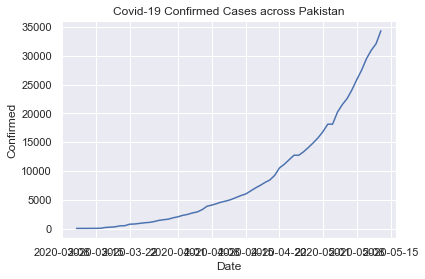

In [62]:
sns.set()
fig=sns.lineplot(data = confirmed_by_date,x = 'Date',y = 'Confirmed')
plt.title("Covid-19 Confirmed Cases across Pakistan");

In [63]:
confirmed_by_regions = (sheet_1.filter(['Region','Date','Confirmed']).groupby(['Date','Region']).agg('sum').reset_index())
confirmed_by_regions

,Date,Region,Confirmed
0,2020-03-11,AJK,0
1,2020-03-11,Balochistan,1
2,2020-03-11,GB,2
3,2020-03-11,ICT,2
4,2020-03-11,KP,0
...,...,...,...
443,2020-05-13,GB,475
444,2020-05-13,ICT,759
445,2020-05-13,KP,5021
446,2020-05-13,Punjab,13225


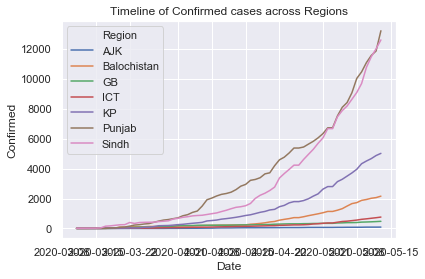

In [64]:
sns.lineplot(data = confirmed_by_regions,x = 'Date',y = 'Confirmed',hue='Region')
plt.title("Timeline of Confirmed cases across Regions");

In [65]:
dead_by_date = (sheet_1.filter(['Date','Dead']).groupby('Date').agg('sum').reset_index())
dead_by_date

,Date,Dead
0,2020-03-11,0
1,2020-03-12,0
2,2020-03-13,0
3,2020-03-14,0
4,2020-03-15,0
...,...,...
59,2020-05-09,618
60,2020-05-10,639
61,2020-05-11,667
62,2020-05-12,706


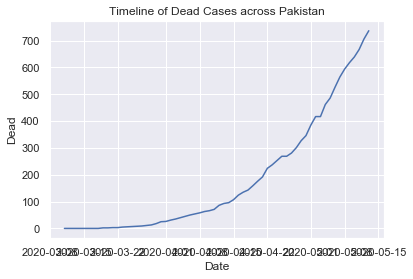

In [66]:
sns.lineplot(data = dead_by_date,x = 'Date',y = 'Dead')
plt.title("Timeline of Dead Cases across Pakistan");


In [67]:
test_by_date = sheet_1.filter(['Date','Total_tests']).groupby('Date').agg('sum')
test_by_date

,Total_tests
Date,
2020-03-11,422
2020-03-12,471
2020-03-13,531
2020-03-14,609
2020-03-15,686
...,...
2020-05-09,270025
2020-05-10,283517
2020-05-11,294894


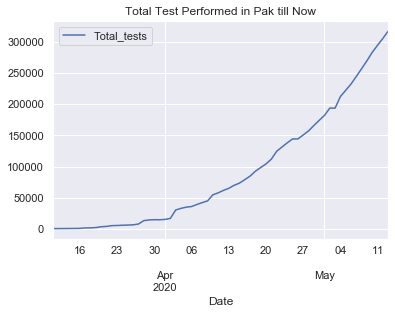

In [68]:
test_by_date.plot()
plt.title("Total Test Performed in Pak till Now");

In [69]:
sheet_1[sheet_1['Region']=='KP']

,Date,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
192,2020-03-11,KP,20,0,0,0,0,0,0,0,28,2
193,2020-03-12,KP,24,0,0,0,0,0,0,4,29,1
194,2020-03-13,KP,27,0,0,0,0,0,0,3,30,1
195,2020-03-14,KP,29,0,0,0,0,0,0,2,31,1
196,2020-03-15,KP,30,0,0,0,0,0,0,1,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251,2020-05-09,KP,26981,4327,1033,221,3073,806,2267,1459,27990,1459
252,2020-05-10,KP,28193,4509,1086,234,3189,602,2587,1212,29202,1212
253,2020-05-11,KP,29463,4669,1126,245,3298,641,2657,1270,30472,1270
254,2020-05-12,KP,30597,4875,2713,257,3362,649,2713,1134,31606,1134


In [70]:
regions_data=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Confirmed','Dead','Recovered','Total_tests','Total_cases','New_cases']).groupby('Region').agg('sum')
regions_data

,Confirmed,Dead,Recovered,Total_tests,New_cases
Region,,,,,
AJK,88,1,0,3037,102
Balochistan,2158,27,1844,15751,267
GB,475,4,127,5748,11
ICT,759,6,632,21257,1056
KP,5021,267,2860,32577,971
Punjab,13225,214,2780,140212,7159
Sindh,12610,218,8668,99117,4064


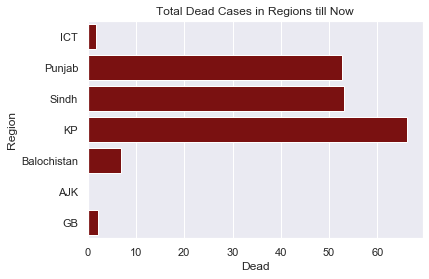

In [71]:
sns.barplot(data=sheet_1,x='Dead',y='Region',color='darkred',ci=None)
plt.title("Total Dead Cases in Regions till Now");

In [72]:
n_hospitalized=sheet_1.filter(['Date','Hospitalized']).groupby(['Date']).agg('sum').reset_index()
n_hospitalized

,Date,Hospitalized
0,2020-03-11,18
1,2020-03-12,18
2,2020-03-13,19
3,2020-03-14,25
4,2020-03-15,28
...,...,...
59,2020-05-09,5434
60,2020-05-10,5719
61,2020-05-11,6230
62,2020-05-12,6661


In [73]:
n_home=sheet_1.filter(['Region','Date','Home_quarantine']).groupby(['Date']).agg('sum').reset_index()
n_home

,Date,Home_quarantine
0,2020-03-11,0
1,2020-03-12,0
2,2020-03-13,0
3,2020-03-14,0
4,2020-03-15,0
...,...,...
59,2020-05-09,13666
60,2020-05-10,15084
61,2020-05-11,15832
62,2020-05-12,16159


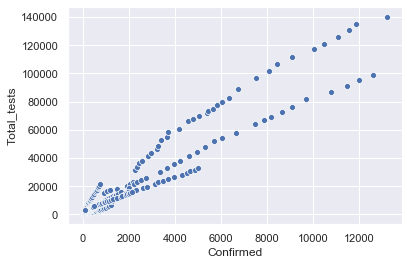

In [74]:
sns.scatterplot(data=sheet1,x='Confirmed',y='Total_tests')

In [75]:
#sns.pairplot(sheet1,hue='Region');

In [76]:
sheet_1.corr()

,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
Cases,1.000000,0.986637,0.865548,0.819773,0.799317,0.897705,0.627764,0.912494,0.973635,0.945861
Confirmed,0.986637,1.000000,0.876453,0.868173,0.817952,0.896838,0.651561,0.896522,0.964557,0.933986
Recovered,0.865548,0.876453,1.000000,0.774818,0.636397,0.729048,0.493792,0.740233,0.822700,0.775494
Dead,0.819773,0.868173,0.774818,1.000000,0.685725,0.740384,0.551056,0.736203,0.775799,0.765963
Active,0.799317,0.817952,0.636397,0.685725,1.000000,0.716929,0.956101,0.713351,0.791797,0.767585
Hospitalized,0.897705,0.896838,0.729048,0.740384,0.716929,1.000000,0.481166,0.838902,0.932568,0.858135
Home_quarantine,0.627764,0.651561,0.493792,0.551056,0.956101,0.481166,1.000000,0.544383,0.603654,0.604494
New_cases,0.912494,0.896522,0.740233,0.736203,0.713351,0.838902,0.544383,1.000000,0.899639,0.951989
Total_tests,0.973635,0.964557,0.822700,0.775799,0.791797,0.932568,0.603654,0.899639,1.000000,0.938607
New_tests,0.945861,0.933986,0.775494,0.765963,0.767585,0.858135,0.604494,0.951989,0.938607,1.000000


In [77]:

hospitalized_by_region=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Hospitalized']).groupby(['Region']).agg('sum')

In [78]:
hospitalized_by_region

,Hospitalized
Region,
AJK,19
Balochistan,31
GB,13
ICT,29
KP,589
Punjab,5700
Sindh,1495


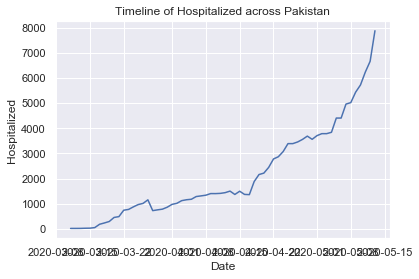

In [79]:
sns.lineplot(data = n_hospitalized,x ='Date', y = 'Hospitalized')
plt.title("Timeline of Hospitalized across Pakistan");

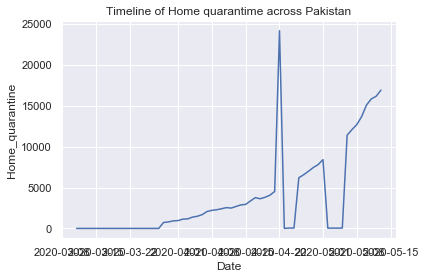

In [80]:
sns.lineplot(data = n_home,x ='Date', y = 'Home_quarantine')
plt.title("Timeline of Home quarantime across Pakistan");

In [81]:
new_cases=sheet_1.filter(['Date','New_cases']).groupby('Date').agg('sum')
new_cases

,New_cases
Date,
2020-03-11,14
2020-03-12,23
2020-03-13,46
2020-03-14,45
2020-03-15,18
...,...
2020-05-09,12397
2020-05-10,12809
2020-05-11,9239


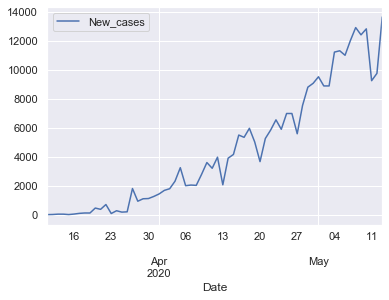

In [82]:
new_cases.plot()

In [83]:
total_recovered=sheet_1.filter(['Date','Region','Recovered']).groupby(['Date']).agg('sum')
total_recovered

,Recovered
Date,
2020-03-11,1
2020-03-12,2
2020-03-13,2
2020-03-14,3
2020-03-15,3
...,...
2020-05-09,7756
2020-05-10,8023
2020-05-11,8212


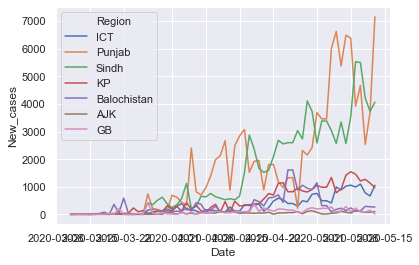

In [84]:
sns.lineplot(data=sheet_1,x='Date',y='New_cases',hue='Region');

In [85]:
total_suspectcases=sheet_1[sheet_1.Date==max(sheet_1.Date)].filter(['Region','Cases']).groupby('Region').agg('sum')
total_suspectcases

,Cases
Region,
AJK,3037
Balochistan,17781
GB,6224
ICT,21257
KP,31568
Punjab,114762
Sindh,99117


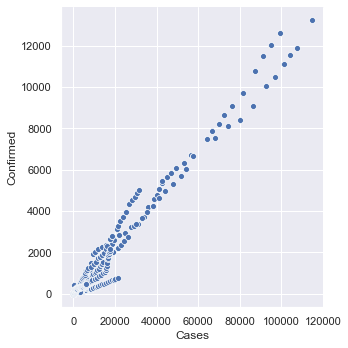

In [86]:
sns.relplot(data=sheet_1,x='Cases',y='Confirmed')

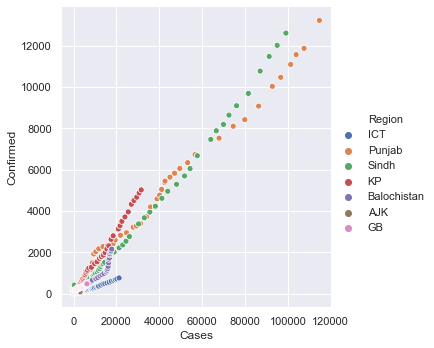

In [87]:
sns.relplot(data=sheet_1,x='Cases',y='Confirmed',hue='Region')

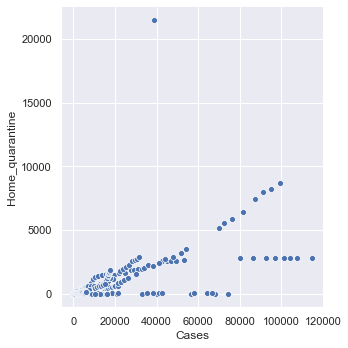

In [88]:
sns.relplot(data=sheet_1,x='Cases',y='Home_quarantine')

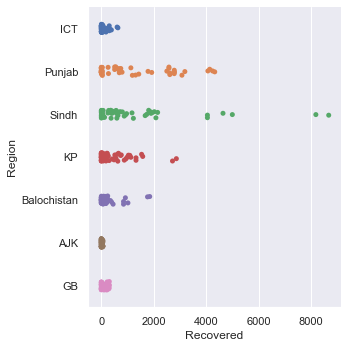

In [89]:
sns.catplot(x='Recovered',y='Region',data=sheet_1);

In [90]:
sheet_1[sheet_1['Date']==max(sheet_1.Date)].filter(['Date','Cases','Confirmed','Recovered','Dead']).groupby('Date').agg('sum')

,Cases,Confirmed,Recovered,Dead
Date,,,,
2020-05-13,293746,34336,16911,737


In [91]:
week_data=sheet_1.filter(['Region','Date','New_tests','New_cases'])

week_data.set_index('Date',inplace=True)
wk_data=week_data.resample('W').sum()

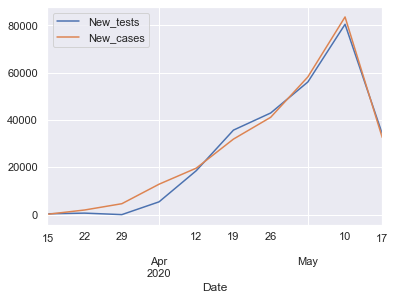

In [92]:
wk_data.plot();

**Cleaning Sheet 2**

In [93]:
sheet2=covid_data.parse('TimeSeries_KeyIndicators_Detail')  #Opening  second sheet 
sheet2.head()


,Date,Province Old,Suspected Cases Last Date,Suspected Cases Last 24 Hrs,Suspected Cases Cumulative,Lab Tests Last 24 Hrs,Lab Tests Cumulative,Confirmed Cases Last Date,Confirmed Cases Last 24 Hrs,Confirmed Cases Cumulative,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Unnamed: 53
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,NaN
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,NaN
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,NaN
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,NaN
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,NaN


In [94]:
sheet2.shape

(238, 54)

In [95]:
sheet2.index

RangeIndex(start=0, stop=238, step=1)

In [96]:
sheet2.columns

Index(['Date', 'Province Old', 'Suspected Cases Last Date',
       'Suspected Cases Last 24 Hrs', 'Suspected Cases Cumulative',
       'Lab Tests Last 24 Hrs', 'Lab Tests Cumulative',
       'Confirmed Cases Last Date', 'Confirmed Cases Last 24 Hrs',
       'Confirmed Cases Cumulative', ' Deaths Last Date',
       ' Deaths Last 24 Hrs', ' Deaths Cumulative',
       ' Deaths Ventilator Last 24 Hrs', 'Transmission Total',
       'Transmission Foreign - Iran', 'Transmission Foreign - Iran %',
       'Transmission Foreign - Other', 'Transmission Foreign - Other %',
       'Transmission Local - Tableegh', 'Transmission Local % - Tableegh',
       'Transmission Local - Others', 'Transmission Local % - Others',
       'Transmission Local', 'Transmission Local %', 'Total Hospitals',
       'Beds for COVID', 'Total Admitted', 'Admitted Stable',
       'Admitted Critical', 'Admitted Venilator', 'Home Quarantine',
       'Recovered', 'Death', 'Quarantine Facilities', 'Last 24 Hrs Arrival',
      

In [97]:
sheet2[sheet2.columns[11:]]

,Deaths Last 24 Hrs,Deaths Cumulative,Deaths Ventilator Last 24 Hrs,Transmission Total,Transmission Foreign - Iran,Transmission Foreign - Iran %,Transmission Foreign - Other,Transmission Foreign - Other %,Transmission Local - Tableegh,Transmission Local % - Tableegh,...,Confirmed HW - Active Nurses,Confirmed HW - Active Others,Confirmed HW - Active Total,Confirmed HW - Active Isolation,Confirmed HW - Active Hospital,Confirmed HW - Active Hospital Stable,Confirmed HW - Active Hospital Ventilator,Confirmed HW - Active Recovered,Confirmed HW - Active Deaths,Unnamed: 53
0,0,0,0,11,1,0.09,2,0.18,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
1,0,1,0,175,139,0.79,2,0.01,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
2,0,3,0,193,155,0.80,5,0.03,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,75,0,0.00,17,0.23,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
4,2,11,0,343,69,0.20,163,0.48,0,0.00,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0,4,0,475,166,0.35,5,0.01,27,0.06,...,3,2,21,26,0,7,7,0,17,2.0
234,0,6,0,759,0,0.00,18,0.02,12,0.02,...,49,29,21,99,89,2,2,0,7,1.0
235,10,267,10,5021,71,0.01,691,0.14,315,0.06,...,117,46,101,264,168,37,36,1,57,2.0
236,3,214,3,13225,768,0.06,1077,0.08,1926,0.15,...,85,46,53,184,23,89,89,0,72,0.0


In [98]:
sheet2.columns=sheet2.columns.str.strip().str.capitalize().str.replace(' ','_')

In [99]:
sheet2['Province_old'].unique()

array(['AJK', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh'],
      dtype=object)

In [100]:
sheet2.head()

,Date,Province_old,Suspected_cases_last_date,Suspected_cases_last_24_hrs,Suspected_cases_cumulative,Lab_tests_last_24_hrs,Lab_tests_cumulative,Confirmed_cases_last_date,Confirmed_cases_last_24_hrs,Confirmed_cases_cumulative,...,Confirmed_hw_-_active_nurses,Confirmed_hw_-_active_others,Confirmed_hw_-_active_total,Confirmed_hw_-_active_isolation,Confirmed_hw_-_active_hospital,Confirmed_hw_-_active_hospital_stable,Confirmed_hw_-_active_hospital_ventilator,Confirmed_hw_-_active_recovered,Confirmed_hw_-_active_deaths,Unnamed:_53
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,0,0,0,0,0,0,0,0,NaN
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,0,0,0,0,0,0,0,0,0,NaN
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,0,0,0,0,0,0,0,0,0,NaN
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,0,0,0,0,0,0,0,0,NaN
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,0,0,0,0,0,0,0,0,0,NaN


In [101]:
sheet2.info()                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 54 columns):
Date                                         238 non-null datetime64[ns]
Province_old                                 238 non-null object
Suspected_cases_last_date                    238 non-null int64
Suspected_cases_last_24_hrs                  238 non-null int64
Suspected_cases_cumulative                   238 non-null int64
Lab_tests_last_24_hrs                        238 non-null int64
Lab_tests_cumulative                         238 non-null int64
Confirmed_cases_last_date                    238 non-null int64
Confirmed_cases_last_24_hrs                  238 non-null int64
Confirmed_cases_cumulative                   238 non-null int64
Deaths_last_date                             238 non-null int64
Deaths_last_24_hrs                           238 non-null int64
Deaths_cumulative                            238 non-null int64
Deaths_ventilator_last_24_hrs                238 non-

In [102]:
sheet2.duplicated().sum()

0

In [103]:
sheet2.isnull().sum()

Date                                           0
Province_old                                   0
Suspected_cases_last_date                      0
Suspected_cases_last_24_hrs                    0
Suspected_cases_cumulative                     0
Lab_tests_last_24_hrs                          0
Lab_tests_cumulative                           0
Confirmed_cases_last_date                      0
Confirmed_cases_last_24_hrs                    0
Confirmed_cases_cumulative                     0
Deaths_last_date                               0
Deaths_last_24_hrs                             0
Deaths_cumulative                              0
Deaths_ventilator_last_24_hrs                  0
Transmission_total                             0
Transmission_foreign_-_iran                    0
Transmission_foreign_-_iran_%                  0
Transmission_foreign_-_other                   0
Transmission_foreign_-_other_%                 0
Transmission_local_-_tableegh                  0
Transmission_local_%

In [104]:
sheet2.isin([0]).sum()    #where column has 0 values

Date                                           0
Province_old                                   0
Suspected_cases_last_date                      0
Suspected_cases_last_24_hrs                    0
Suspected_cases_cumulative                     0
Lab_tests_last_24_hrs                          1
Lab_tests_cumulative                           0
Confirmed_cases_last_date                      0
Confirmed_cases_last_24_hrs                   14
Confirmed_cases_cumulative                     0
Deaths_last_date                              37
Deaths_last_24_hrs                           120
Deaths_cumulative                             35
Deaths_ventilator_last_24_hrs                196
Transmission_total                             0
Transmission_foreign_-_iran                   34
Transmission_foreign_-_iran_%                 34
Transmission_foreign_-_other                   0
Transmission_foreign_-_other_%                18
Transmission_local_-_tableegh                 24
Transmission_local_%

In [105]:
sheet2.isin([0]).sum()>=len(sheet2)/2   #which columns has 0 values equal or more than number of enteries or length of dataframe

Date                                         False
Province_old                                 False
Suspected_cases_last_date                    False
Suspected_cases_last_24_hrs                  False
Suspected_cases_cumulative                   False
Lab_tests_last_24_hrs                        False
Lab_tests_cumulative                         False
Confirmed_cases_last_date                    False
Confirmed_cases_last_24_hrs                  False
Confirmed_cases_cumulative                   False
Deaths_last_date                             False
Deaths_last_24_hrs                            True
Deaths_cumulative                            False
Deaths_ventilator_last_24_hrs                 True
Transmission_total                           False
Transmission_foreign_-_iran                  False
Transmission_foreign_-_iran_%                False
Transmission_foreign_-_other                 False
Transmission_foreign_-_other_%               False
Transmission_local_-_tableegh  

In [106]:
cols=np.where(((sheet2.isin([0]).sum())>=(len(sheet2)/2))==True)
cols

(array([11, 13, 30, 36, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
       dtype=int64),)

**Dropping Columns more than length of datatframe or enteries**

In [107]:
sheet2.drop(sheet2.columns[cols],axis=1,inplace=True)

In [108]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 40 columns):
Date                               238 non-null datetime64[ns]
Province_old                       238 non-null object
Suspected_cases_last_date          238 non-null int64
Suspected_cases_last_24_hrs        238 non-null int64
Suspected_cases_cumulative         238 non-null int64
Lab_tests_last_24_hrs              238 non-null int64
Lab_tests_cumulative               238 non-null int64
Confirmed_cases_last_date          238 non-null int64
Confirmed_cases_last_24_hrs        238 non-null int64
Confirmed_cases_cumulative         238 non-null int64
Deaths_last_date                   238 non-null int64
Deaths_cumulative                  238 non-null int64
Transmission_total                 238 non-null int64
Transmission_foreign_-_iran        238 non-null int64
Transmission_foreign_-_iran_%      238 non-null float64
Transmission_foreign_-_other       238 non-null int64
Transmission_foreig

In [109]:
sheet2.head()

,Date,Province_old,Suspected_cases_last_date,Suspected_cases_last_24_hrs,Suspected_cases_cumulative,Lab_tests_last_24_hrs,Lab_tests_cumulative,Confirmed_cases_last_date,Confirmed_cases_last_24_hrs,Confirmed_cases_cumulative,...,Death,Quarantine_facilities,Last_24_hrs_arrival,Last_24_hrs_departure,Cumulative_quarantined,Number_of_tests,Results_achieved,Test_positive_cases,Test_positive_cases_%,Unnamed:_53
0,2020-04-04,AJK,322,21,343,21,343,9,2,11,...,0,57,10,61,192,107,102,5,0.05,NaN
1,2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,...,1,68,17,0,273,230,230,6,0.03,NaN
2,2020-04-04,GB,961,2,963,844,860,190,3,193,...,3,47,0,232,274,963,860,193,0.23,NaN
3,2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,...,0,6,213,0,243,213,27,2,0.07,NaN
4,2020-04-04,KP,1938,431,2369,181,1624,311,32,343,...,11,102,113,140,3306,1640,1011,293,0.29,NaN


In [110]:
sheet2.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                                 0
Province_old                         0
Suspected_cases_last_date            0
Suspected_cases_last_24_hrs          0
Suspected_cases_cumulative           0
Lab_tests_last_24_hrs                0
Lab_tests_cumulative                 0
Confirmed_cases_last_date            0
Confirmed_cases_last_24_hrs          0
Confirmed_cases_cumulative           0
Deaths_last_date                     0
Deaths_cumulative                    0
Transmission_total                   0
Transmission_foreign_-_iran          0
Transmission_foreign_-_iran_%        0
Transmission_foreign_-_other         0
Transmission_foreign_-_other_%       0
Transmission_local_-_tableegh        0
Transmission_local_%_-_tableegh      0
Transmission_local_-_others          0
Transmission_local_%_-_others        0
Transmission_local                   0
Transmission_local_%                 0
Total_hospitals                      0
Beds_for_covid                       0
Total_admitted           

In [111]:
sheet2.drop('Unnamed:_53',axis=1,inplace=True)
sheet2.shape

(238, 39)

In [112]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 39 columns):
Date                               238 non-null datetime64[ns]
Province_old                       238 non-null object
Suspected_cases_last_date          238 non-null int64
Suspected_cases_last_24_hrs        238 non-null int64
Suspected_cases_cumulative         238 non-null int64
Lab_tests_last_24_hrs              238 non-null int64
Lab_tests_cumulative               238 non-null int64
Confirmed_cases_last_date          238 non-null int64
Confirmed_cases_last_24_hrs        238 non-null int64
Confirmed_cases_cumulative         238 non-null int64
Deaths_last_date                   238 non-null int64
Deaths_cumulative                  238 non-null int64
Transmission_total                 238 non-null int64
Transmission_foreign_-_iran        238 non-null int64
Transmission_foreign_-_iran_%      238 non-null float64
Transmission_foreign_-_other       238 non-null int64
Transmission_foreig

In [113]:
sheet2.rename(columns={'Province_old':'Region','Suspected_cases_last_date':'Cases(till)','Suspected_cases_last_24_hrs':'Cases (24 hrs)','Suspected_cases_cumulative':'Total_cases','Lab_tests_last_24_hrs':'New_labtest','Lab_tests_cumulative':'Total_labtests','Confirmed_cases_last_date':'Confirmed (till)','Confirmed_cases_last_24_hrs':'New_confirmed','Confirmed_cases_cumulative':'Total_confirmed','Deaths_last_date':'Death (till)','Deaths_cumulative':'Total_deaths','Last_24_hrs_arrival':'New_arrivals','Last_24_hrs_departure':'New_departure','Cumulative_quarantined':'Total_quarantine','Test_positive_cases':'Test_positive','Test_positive_cases_%':'Test_postivie(%)'},inplace=True)


In [114]:
sheet2.rename(columns={'Transmission_foreign_-_iran':'Foreign_transmission(Iran)','Transmission_foreign_-_iran_%':'%Foreign_transmission(Iran)','Transmission_foreign_-_other':'Foreign_transmission(other)','Transmission_foreign_-_other_%':'%Foreign_transmission(Other)','Transmission_local_-_tableegh':'Local_transmission(Tableegh)','Transmission_local_%_-_tableegh':'%Local_transmission(Tableegh)','Transmission_local_-_others':'Local_transmission(Other)','Transmission_local_%_-_others':'Local_transmission(Other)','Transmission_local':'Total_Transmission(local)','Transmission_local_%':'%Total_Transmission(local)'},inplace=True)

In [115]:
sheet2.columns

Index(['Date', 'Region', 'Cases(till)', 'Cases (24 hrs)', 'Total_cases',
       'New_labtest', 'Total_labtests', 'Confirmed (till)', 'New_confirmed',
       'Total_confirmed', 'Death (till)', 'Total_deaths', 'Transmission_total',
       'Foreign_transmission(Iran)', '%Foreign_transmission(Iran)',
       'Foreign_transmission(other)', '%Foreign_transmission(Other)',
       'Local_transmission(Tableegh)', '%Local_transmission(Tableegh)',
       'Local_transmission(Other)', 'Local_transmission(Other)',
       'Total_Transmission(local)', '%Total_Transmission(local)',
       'Total_hospitals', 'Beds_for_covid', 'Total_admitted',
       'Admitted_stable', 'Admitted_critical', 'Home_quarantine', 'Recovered',
       'Death', 'Quarantine_facilities', 'New_arrivals', 'New_departure',
       'Total_quarantine', 'Number_of_tests', 'Results_achieved',
       'Test_positive', 'Test_postivie(%)'],
      dtype='object')

In [116]:
min(sheet2.Date)

Timestamp('2020-04-04 00:00:00')

In [117]:
max(sheet2.Date)

Timestamp('2020-05-13 00:00:00')

In [118]:
max(sheet2.Date)-min(sheet2.Date)

Timedelta('39 days 00:00:00')

In [119]:
sheet2.columns

Index(['Date', 'Region', 'Cases(till)', 'Cases (24 hrs)', 'Total_cases',
       'New_labtest', 'Total_labtests', 'Confirmed (till)', 'New_confirmed',
       'Total_confirmed', 'Death (till)', 'Total_deaths', 'Transmission_total',
       'Foreign_transmission(Iran)', '%Foreign_transmission(Iran)',
       'Foreign_transmission(other)', '%Foreign_transmission(Other)',
       'Local_transmission(Tableegh)', '%Local_transmission(Tableegh)',
       'Local_transmission(Other)', 'Local_transmission(Other)',
       'Total_Transmission(local)', '%Total_Transmission(local)',
       'Total_hospitals', 'Beds_for_covid', 'Total_admitted',
       'Admitted_stable', 'Admitted_critical', 'Home_quarantine', 'Recovered',
       'Death', 'Quarantine_facilities', 'New_arrivals', 'New_departure',
       'Total_quarantine', 'Number_of_tests', 'Results_achieved',
       'Test_positive', 'Test_postivie(%)'],
      dtype='object')

In [120]:
sheet2[sheet2.Date==max(sheet2.Date)].Beds_for_covid

231     304
232    2136
233     151
234     430
235    5598
236    7753
237    4688
Name: Beds_for_covid, dtype: int64

In [121]:
sheet2.Region.unique()

array(['AJK', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh'],
      dtype=object)

In [123]:
sheet2.Region.value_counts()   #values are less than days so missing some dates value

Balochistan    34
Sindh          34
KP             34
AJK            34
ICT            34
GB             34
Punjab         34
Name: Region, dtype: int64

In [127]:
sheet2['Total_confirmed'].shape

(238,)

In [128]:
sheet_1.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'AJK', 'GB'],
      dtype=object)

In [129]:
sheet2.Region.unique()

array(['AJK', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh'],
      dtype=object)

In [130]:
sheet2.set_index('Date',inplace=True)
sheet2.head()

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,Recovered,Death,Quarantine_facilities,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postivie(%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,AJK,322,21,343,21,343,9,2,11,0,...,0,0,57,10,61,192,107,102,5,0.05
2020-04-04,Balochistan,2171,230,2401,0,2401,169,6,175,1,...,17,1,68,17,0,273,230,230,6,0.03
2020-04-04,GB,961,2,963,844,860,190,3,193,3,...,9,3,47,0,232,274,963,860,193,0.23
2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,0,...,3,0,6,213,0,243,213,27,2,0.07
2020-04-04,KP,1938,431,2369,181,1624,311,32,343,9,...,30,11,102,113,140,3306,1640,1011,293,0.29


In [131]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(sheet2[sheet2.Region=='KP'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [132]:
pd.date_range(start =sheet2.index.min(), end = sheet2.index.max()).difference(sheet2[sheet2.Region=='Punjab'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [133]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='ICT'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [134]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(sheet2[sheet2.Region=='Sindh'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [135]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='GB'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [136]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='AJK'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [137]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max() ).difference(sheet2[sheet2.Region=='Balochistan'].index)

DatetimeIndex(['2020-04-27', '2020-05-03', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-11'],
              dtype='datetime64[ns]', freq=None)

In [138]:
sheet2.duplicated().sum()

7

In [139]:
sheet2[sheet2.duplicated()==True]              #duplicated is data from previous data and we still can't lose data for date time interval even if its providing previous date info 

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,Recovered,Death,Quarantine_facilities,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postivie(%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-26,AJK,1522,66,1588,66,1588,55,0,55,0,...,32,0,60,28,9,181,715,633,42,0.07
2020-04-26,Balochistan,8794,1610,10404,470,7212,656,66,722,10,...,176,11,68,184,22,962,7682,7212,722,0.10
2020-04-26,GB,3434,157,3591,111,3273,307,1,308,3,...,216,3,43,18,7,116,3591,3273,308,0.09
2020-04-26,ICT,8059,396,8455,396,8455,223,12,235,3,...,29,3,16,0,0,295,2576,2576,34,0.01
2020-04-26,KP,12100,821,12921,821,13930,1708,85,1793,89,...,485,93,279,752,163,1200,1730,1730,206,0.12
2020-04-26,Punjab,41126,1330,42456,1755,71726,5046,332,5378,73,...,1126,81,233,0,0,5165,15490,12633,2840,0.22
2020-04-26,Sindh,35582,2599,38181,2599,38181,3945,287,4232,75,...,802,78,17,0,0,765,7569,7569,1191,0.16


In [140]:
(sheet2[sheet2.index=='2020-04-25'].reset_index()==sheet2[sheet2.index=='2020-04-26'].reset_index()).sum()

Date                             0
Region                           7
Cases(till)                      7
Cases (24 hrs)                   7
Total_cases                      7
New_labtest                      7
Total_labtests                   7
Confirmed (till)                 7
New_confirmed                    7
Total_confirmed                  7
Death (till)                     7
Total_deaths                     7
Transmission_total               7
Foreign_transmission(Iran)       7
%Foreign_transmission(Iran)      7
Foreign_transmission(other)      7
%Foreign_transmission(Other)     7
Local_transmission(Tableegh)     7
%Local_transmission(Tableegh)    7
Local_transmission(Other)        7
Local_transmission(Other)        7
Total_Transmission(local)        7
%Total_Transmission(local)       7
Total_hospitals                  7
Beds_for_covid                   7
Total_admitted                   7
Admitted_stable                  7
Admitted_critical                7
Home_quarantine     

**Filling values for missing dates data in all Regions**

In [141]:
sheet2.Region.unique()

array(['AJK', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh'],
      dtype=object)

In [142]:
ajk_data=sheet2[sheet2.Region=='AJK']

In [143]:
ajk_data.head()

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,Recovered,Death,Quarantine_facilities,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postivie(%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,AJK,322,21,343,21,343,9,2,11,0,...,0,0,57,10,61,192,107,102,5,0.050
2020-04-05,AJK,343,42,385,42,385,11,1,12,0,...,1,0,57,25,92,170,119,102,5,0.050
2020-04-06,AJK,385,15,400,15,400,12,3,15,0,...,1,0,57,19,94,171,135,117,8,0.070
2020-04-07,AJK,400,84,484,84,484,15,3,18,0,...,1,0,57,20,112,157,155,117,10,0.085
2020-04-08,AJK,484,50,534,50,534,18,1,19,0,...,1,0,57,20,112,173,149,123,10,0.080


In [144]:
ajk_data=ajk_data.resample('D').ffill()

In [145]:
ajk_data.head()

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,Recovered,Death,Quarantine_facilities,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postivie(%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,AJK,322,21,343,21,343,9,2,11,0,...,0,0,57,10,61,192,107,102,5,0.050
2020-04-05,AJK,343,42,385,42,385,11,1,12,0,...,1,0,57,25,92,170,119,102,5,0.050
2020-04-06,AJK,385,15,400,15,400,12,3,15,0,...,1,0,57,19,94,171,135,117,8,0.070
2020-04-07,AJK,400,84,484,84,484,15,3,18,0,...,1,0,57,20,112,157,155,117,10,0.085
2020-04-08,AJK,484,50,534,50,534,18,1,19,0,...,1,0,57,20,112,173,149,123,10,0.080


In [146]:
ajk_data.shape

(40, 38)

In [147]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(ajk_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [148]:
punjab_data=sheet2[sheet2.Region=='Punjab']

In [149]:
punjab_data.shape

(34, 38)

In [150]:
punjab_data=punjab_data.resample('D').ffill()

In [151]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(punjab_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [152]:
punjab_data.shape

(40, 38)

In [153]:
kp_data=sheet2[sheet2.Region=='KP']

In [154]:
kp_data.shape

(34, 38)

In [155]:
kp_data=kp_data.resample('D').ffill()

In [156]:
kp_data.shape

(40, 38)

In [157]:
ict_data=sheet2[sheet2.Region=='ICT']

In [158]:
ict_data.shape

(34, 38)

In [159]:
ict_data=ict_data.resample('D').ffill()

In [160]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(ict_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [161]:
gb_data=sheet2[sheet2.Region=='GB']

In [162]:
gb_data=gb_data.resample('D').ffill()

In [163]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(gb_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [164]:
baloch_data=sheet2[sheet2.Region=='Balochistan']

In [165]:
baloch_data=baloch_data.resample('D').ffill()

In [166]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(baloch_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [167]:
sindh_data=sheet2[sheet2.Region=='Sindh']

In [168]:
sindh_data=sindh_data.resample('D').ffill()

In [169]:
pd.date_range(start =sheet2.index.min(), end =sheet2.index.max()).difference(sindh_data.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [170]:
sheet_2=pd.concat([ict_data,punjab_data,sindh_data,kp_data,baloch_data,ajk_data,gb_data])

In [171]:
sheet_2

,Region,Cases(till),Cases (24 hrs),Total_cases,New_labtest,Total_labtests,Confirmed (till),New_confirmed,Total_confirmed,Death (till),...,Recovered,Death,Quarantine_facilities,New_arrivals,New_departure,Total_quarantine,Number_of_tests,Results_achieved,Test_positive,Test_postivie(%)
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-04,ICT,2395,174,2569,174,2569,68,7,75,0,...,3,0,6,213,0,243,213,27,2,0.07
2020-04-05,ICT,2569,175,2744,175,2744,75,3,78,0,...,3,0,10,180,0,426,180,27,2,0.07
2020-04-06,ICT,2744,127,2871,127,2871,78,4,82,0,...,3,0,10,0,321,105,396,423,24,0.06
2020-04-07,ICT,2871,50,2921,50,2921,82,1,83,0,...,3,1,10,137,81,161,0,423,24,0.06
2020-04-08,ICT,2921,175,3096,175,3096,83,9,92,1,...,3,1,12,159,0,320,137,423,24,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-09,GB,5658,228,5886,128,5135,394,27,421,3,...,108,298,3,65,0,72,531,5886,5420,421.00
2020-05-10,GB,5886,97,5983,175,5310,421,9,430,3,...,110,303,4,61,0,106,472,5983,5558,430.00
2020-05-11,GB,5886,97,5983,175,5310,421,9,430,3,...,110,303,4,61,0,106,472,5983,5558,430.00


In [172]:
sheet_2.Region.value_counts()

Balochistan    40
Sindh          40
KP             40
GB             40
ICT            40
AJK            40
Punjab         40
Name: Region, dtype: int64

In [293]:
sheet_1.head()

,Date,Region,Cases,Confirmed,Recovered,Dead,Active,Hospitalized,Home_quarantine,New_cases,Total_tests,New_tests
0,2020-03-11,ICT,48,2,0,0,2,2,0,3,80,8
1,2020-03-12,ICT,52,2,0,0,2,2,0,4,85,5
2,2020-03-13,ICT,57,2,0,0,2,2,0,5,92,7
3,2020-03-14,ICT,62,3,0,0,3,3,0,5,99,7
4,2020-03-15,ICT,65,4,0,0,4,4,0,3,115,16


In [174]:
(sheet_2['Total_confirmed'].reset_index(drop=True)==sheet_1[sheet_1['Date']>=sheet_2.index.min()].Confirmed.reset_index(drop=True)).sum()

246

**Cleaning Sheet 3**

In [175]:
sheet3=covid_data.parse('TimeSeries_Action_Screen')  #Opening  third sheet
sheet3.head()


,Date,Cumulative travelers Screened,Suspected at Points of Entry,Travelers Screened at Points ofEntry in last 24 hours
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [176]:
sheet3.shape

(24, 4)

In [177]:
sheet3.columns=['Date','Total_travelers_screened','Suspected_travelers','New_travelers_screened']

In [178]:
sheet3.head()

,Date,Total_travelers_screened,Suspected_travelers,New_travelers_screened
0,11-Mar-2020,873288,26,21102
1,12-Mar-2020,894256,29,20968
2,13-Mar-2020,913542,33,19286
3,14-Mar-2020,933970,43,20428
4,15-Mar-2020,954646,59,20676


In [179]:
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null object
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [180]:
sheet3['Date']=pd.to_datetime(sheet3['Date'])
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Date                        24 non-null datetime64[ns]
Total_travelers_screened    24 non-null int64
Suspected_travelers         24 non-null int64
New_travelers_screened      24 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 896.0 bytes


In [181]:
sheet3.isnull().sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

In [182]:
sheet3.duplicated().sum()

0

In [183]:
sheet3.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                        0
Total_travelers_screened    0
Suspected_travelers         0
New_travelers_screened      0
dtype: int64

In [184]:
min(sheet3['Date'])

Timestamp('2020-03-11 00:00:00')

In [185]:
max(sheet3['Date'])

Timestamp('2020-04-03 00:00:00')

In [186]:
max(sheet3['Date'])-min(sheet3['Date'])

Timedelta('23 days 00:00:00')

**Cleaning Sheet 4** 

In [187]:
sheet4=covid_data.parse('TimeSeries_Action_Call')  #Opening  first sheet
sheet4.head()

,Returnees,Advised Self-Quarantine,Cumulative no offirst-time calls,Cumulativefollow-up calls,Date,First-time calls inpast 24 hrs,Follow-up calls inpast 24 hrs
0,Returnees from Iran,0,9459,2553,11-Mar-2020,0,353
1,Returnees from China,11,5342,7746,11-Mar-2020,17,400
2,Returnees from Iran,14,9475,3221,12-Mar-2020,16,668
3,Returnees from China,7,5352,7855,12-Mar-2020,10,109
4,Returnees from Iran,0,9475,3853,13-Mar-2020,0,632


In [188]:
sheet4.shape

(40, 7)

In [189]:
sheet4.columns=['Returnees','Advised_quarantine','Total_firsttime_calls','Total_followup_calls','Date','Firsttime_calls (24h)','Followup_calls (24h)']

In [190]:
sheet4.head()

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Date,Firsttime_calls (24h),Followup_calls (24h)
0,Returnees from Iran,0,9459,2553,11-Mar-2020,0,353
1,Returnees from China,11,5342,7746,11-Mar-2020,17,400
2,Returnees from Iran,14,9475,3221,12-Mar-2020,16,668
3,Returnees from China,7,5352,7855,12-Mar-2020,10,109
4,Returnees from Iran,0,9475,3853,13-Mar-2020,0,632


In [191]:
sheet4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Returnees                40 non-null object
Advised_quarantine       40 non-null int64
Total_firsttime_calls    40 non-null int64
Total_followup_calls     40 non-null int64
Date                     40 non-null object
Firsttime_calls (24h)    40 non-null int64
Followup_calls (24h)     40 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.3+ KB


In [192]:
sheet4['Date']=pd.to_datetime(sheet4['Date'])

In [193]:
sheet4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Returnees                40 non-null object
Advised_quarantine       40 non-null int64
Total_firsttime_calls    40 non-null int64
Total_followup_calls     40 non-null int64
Date                     40 non-null datetime64[ns]
Firsttime_calls (24h)    40 non-null int64
Followup_calls (24h)     40 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ KB


In [194]:
max(sheet4['Date'])

Timestamp('2020-03-30 00:00:00')

In [195]:
max(sheet4['Date'])-min(sheet4['Date'])

Timedelta('19 days 00:00:00')

In [196]:
sheet4.isnull().sum()

Returnees                0
Advised_quarantine       0
Total_firsttime_calls    0
Total_followup_calls     0
Date                     0
Firsttime_calls (24h)    0
Followup_calls (24h)     0
dtype: int64

In [197]:
sheet4.duplicated().sum()

0

In [198]:
sheet4.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Returnees                0
Advised_quarantine       0
Total_firsttime_calls    0
Total_followup_calls     0
Date                     0
Firsttime_calls (24h)    0
Followup_calls (24h)     0
dtype: int64

In [199]:
sheet4.Returnees.value_counts()

Returnees from Iran     20
Returnees from China    20
Name: Returnees, dtype: int64

In [200]:
sheet4[sheet4['Returnees']=='Returnees from China']

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Date,Firsttime_calls (24h),Followup_calls (24h)
1,Returnees from China,11,5342,7746,2020-03-11,17,400
3,Returnees from China,7,5352,7855,2020-03-12,10,109
5,Returnees from China,10,5362,8041,2020-03-13,10,186
7,Returnees from China,5,5370,8083,2020-03-14,8,42
9,Returnees from China,0,5370,8160,2020-03-15,0,77
11,Returnees from China,11,5394,8160,2020-03-16,24,0
13,Returnees from China,13,5413,8180,2020-03-17,19,20
15,Returnees from China,16,5439,8899,2020-03-18,26,719
17,Returnees from China,0,5441,9392,2020-03-19,2,493
19,Returnees from China,8,5458,9392,2020-03-20,17,0


In [201]:
total_returnees_quarantine=sheet4.filter(['Returnees','Advised_quarantine','Date']).groupby(['Returnees']).agg('sum')
total_returnees_quarantine
                                                                                                        

,Advised_quarantine
Returnees,
Returnees from China,86
Returnees from Iran,21


In [202]:
iran_data=sheet4[sheet4['Returnees']=='Returnees from Iran']

In [203]:
iran_data=iran_data.set_index('Date')

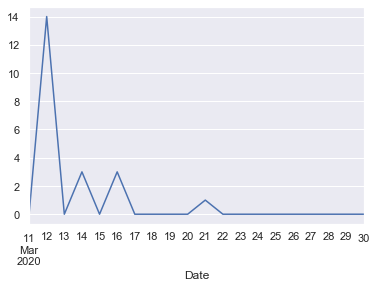

In [204]:
iran_data['Advised_quarantine'].plot();

In [205]:
china_data=sheet4[sheet4['Returnees']=='Returnees from China']

In [206]:
china_data=china_data.set_index('Date')
china_data.shape

(20, 6)

In [207]:
china_data.head()

,Returnees,Advised_quarantine,Total_firsttime_calls,Total_followup_calls,Firsttime_calls (24h),Followup_calls (24h)
Date,,,,,,
2020-03-11,Returnees from China,11,5342,7746,17,400
2020-03-12,Returnees from China,7,5352,7855,10,109
2020-03-13,Returnees from China,10,5362,8041,10,186
2020-03-14,Returnees from China,5,5370,8083,8,42
2020-03-15,Returnees from China,0,5370,8160,0,77


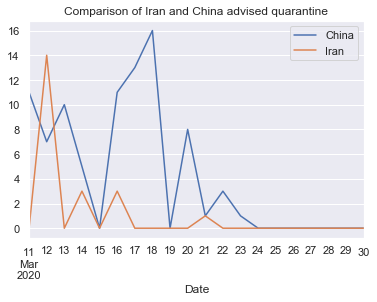

In [208]:
china_data['Advised_quarantine'].plot(label='China')
iran_data['Advised_quarantine'].plot(label='Iran')
plt.title("Comparison of Iran and China advised quarantine")
plt.legend(loc=1)
plt.show();


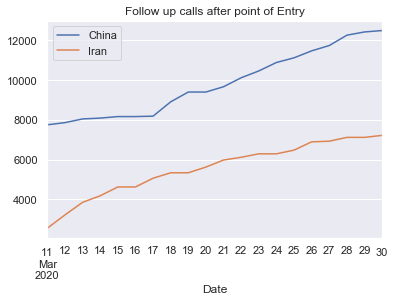

In [209]:
china_data['Total_followup_calls'].plot(label='China')
iran_data['Total_followup_calls'].plot(label='Iran')
plt.title("Follow up calls after point of Entry")
plt.legend(loc=2)
plt.show();

**Cleaning Sheet 5**

In [210]:
sheet5=covid_data.parse('TimeSeries_COVID_News')  #Opening  fifth sheet
sheet5.head()

,Unnamed: 0,Date,News,Agg News
0,0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [211]:
sheet5.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet5.head()

,Date,News,Agg News
0,11-Mar-2020,Updates: Pakistan:,Updates: Pakistan: \n Three new cases have bee...
1,11-Mar-2020,Three new cases have been confirmed in the pas...,Updates: Pakistan: \n Three new cases have bee...
2,11-Mar-2020,Number of calls to passengers returning from I...,Updates: Pakistan: \n Three new cases have bee...
3,11-Mar-2020,Global:,Updates: Pakistan: \n Three new cases have bee...
4,11-Mar-2020,"Total cases: 118,887, Total Deaths: 4,290 •",Updates: Pakistan: \n Three new cases have bee...


In [212]:
sheet5.columns=['Date','NH_news','Daily_news']

In [213]:
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date          146 non-null object
NH_news       146 non-null object
Daily_news    146 non-null object
dtypes: object(3)
memory usage: 3.5+ KB


In [214]:
sheet5['Date']=pd.to_datetime(sheet5['Date'])
sheet5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Date          146 non-null datetime64[ns]
NH_news       146 non-null object
Daily_news    146 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 3.5+ KB


In [215]:
max(sheet5['Date'])

Timestamp('2020-04-03 00:00:00')

In [216]:
max(sheet4['Date'])-min(sheet4['Date'])

Timedelta('19 days 00:00:00')

In [217]:
sheet5.isnull().sum()

Date          0
NH_news       0
Daily_news    0
dtype: int64

In [218]:
print(sheet5.duplicated().sum())
sheet5.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

0


Date          0
NH_news       0
Daily_news    0
dtype: int64

In [219]:
sheet5.shape

(146, 3)

**Cleaning Sheet 6**

In [220]:
sheet6=covid_data.parse('TimeSeries_NIH_Response')  #Opening  first sheet
sheet6.head()

,Unnamed: 0,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,0,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [221]:
sheet6.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet6.head()

,Date,NIH Preparedness and Response,Agg NIH Preparedness and Response
0,11-Mar-2020,BSL-3 mobile lab with state of art equipment h...,BSL-3 mobile lab with state of art equipment h...
1,11-Mar-2020,IPC trainings have been completed at Gilgit an...,BSL-3 mobile lab with state of art equipment h...
2,11-Mar-2020,Training of the GB lab staff has been conducte...,BSL-3 mobile lab with state of art equipment h...
3,11-Mar-2020,IPC training is in progress for FG Hospital st...,BSL-3 mobile lab with state of art equipment h...
4,12-Mar-2020,BSL-3 mobile lab is ready for testing. •,BSL-3 mobile lab is ready for testing. • \n I...


In [222]:
sheet6.columns=['Date','Steps_takenby_NIH','Steps_details']

In [223]:
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                 65 non-null object
Steps_takenby_NIH    65 non-null object
Steps_details        65 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [224]:
sheet6['Date']=pd.to_datetime(sheet6['Date'])
sheet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Date                 65 non-null datetime64[ns]
Steps_takenby_NIH    65 non-null object
Steps_details        65 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [225]:
min(sheet6['Date'])

Timestamp('2020-03-11 00:00:00')

In [226]:
max(sheet6['Date'])

Timestamp('2020-04-03 00:00:00')

In [227]:
max(sheet6['Date'])-min(sheet6['Date'])

Timedelta('23 days 00:00:00')

In [228]:
print(sheet6.isnull().sum())

Date                 0
Steps_takenby_NIH    0
Steps_details        0
dtype: int64


In [229]:
sheet6.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                 0
Steps_takenby_NIH    0
Steps_details        0
dtype: int64

In [230]:
sheet6.duplicated().sum()

0

In [231]:
sheet6.shape

(65, 3)

**Cleaning Sheet 7**

In [232]:
sheet7=covid_data.parse('TimeSeries_NIH_Risk')  #Opening  first sheet
sheet7.head()



 

,Unnamed: 0,Date,Risk Assessment NIH
0,0,11-Mar-2020,MODERATE.
1,0,12-Mar-2020,MODERATE.
2,0,13-Mar-2020,MODERATE.
3,0,14-Mar-2020,MODERATE.
4,0,15-Mar-2020,Moderate


In [233]:
sheet7.shape

(24, 3)

In [234]:
sheet7['Unnamed: 0'].isin([0]).sum()

24

In [235]:
sheet7.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet7.head()

,Date,Risk Assessment NIH
0,11-Mar-2020,MODERATE.
1,12-Mar-2020,MODERATE.
2,13-Mar-2020,MODERATE.
3,14-Mar-2020,MODERATE.
4,15-Mar-2020,Moderate


In [236]:
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null object
Risk Assessment NIH    24 non-null object
dtypes: object(2)
memory usage: 512.0+ bytes


In [237]:
sheet7['Date']=pd.to_datetime(sheet7['Date'])
sheet7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Date                   24 non-null datetime64[ns]
Risk Assessment NIH    24 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 512.0+ bytes


In [238]:
max(sheet7['Date'])

Timestamp('2020-04-03 00:00:00')

In [239]:
max(sheet7['Date'])-min(sheet7['Date'])

Timedelta('23 days 00:00:00')

In [240]:
print(sheet7.isnull().sum())
sheet7.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Date                   0
Risk Assessment NIH    0
dtype: int64


Date                   0
Risk Assessment NIH    0
dtype: int64

In [241]:
sheet7.duplicated().sum()

0

**Cleaninng Sheet 8**

In [242]:
sheet8=covid_data.parse('TimeSeries_Province_Response')  #Opening  first sheet
sheet8.head()



,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [243]:
sheet8.shape

(166, 5)

In [244]:
sheet8[sheet8['Unnamed: 0']==4]

,Unnamed: 0,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
4,4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...
12,4,KP & TD,01 alert generated (self-referral) in Police a...,12-Mar-2020,01 alert generated (self-referral) in Police a...
20,4,KP & TD,"A total of 75 personnel including doctors, par...",13-Mar-2020,"A total of 75 personnel including doctors, par..."
29,4,AJK,Chest Diseases General Hospital (CDGH) Hill Ch...,14-Mar-2020,Chest Diseases General Hospital (CDGH) Hill Ch...
36,4,Sindh,Quarantine facilities established and operatio...,15-Mar-2020,Quarantine facilities established and operatio...
46,4,KP & TD,Four new suspected cases reported from Police ...,16-Mar-2020,Four new suspected cases reported from Police ...
54,4,Punjab,"PDSRU is in 24/7 coordination with NIH, Islama...",17-Mar-2020,"PDSRU is in 24/7 coordination with NIH, Islama..."
62,4,KP & TD,Quarantine facility for 171 passengers establi...,18-Mar-2020,Quarantine facility for 171 passengers establi...
70,4,AJK,Contact tracing of confirmed case being carrie...,19-Mar-2020,Contact tracing of confirmed case being carrie...
76,4,KP & TD,Contact tracing of all suspected and confirmed...,20-Mar-2020,Contact tracing of all suspected and confirmed...


In [245]:
sheet8.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet8.head()

,region,Provinces Preparedness and Response,Date,Agg Provinces Preparedness and Response
0,Balochistan,316 newly arrived individuals screened and qua...,11-Mar-2020,316 newly arrived individuals screened and qua...
1,Balochistan,14 Chinese nationals quarantined at East Bay E...,11-Mar-2020,316 newly arrived individuals screened and qua...
2,Sindh,Staff deployed to designated quarantine facili...,11-Mar-2020,Staff deployed to designated quarantine facili...
3,Sindh,Training and orientation sessions for the heal...,11-Mar-2020,Staff deployed to designated quarantine facili...
4,KP & TD,24 High Dependency Units established across KP...,11-Mar-2020,24 High Dependency Units established across KP...


In [246]:
sheet8.columns=['Region','Steps_takenby_provinces','Date','Steps_details']

In [247]:
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
Region                     166 non-null object
Steps_takenby_provinces    166 non-null object
Date                       166 non-null object
Steps_details              166 non-null object
dtypes: object(4)
memory usage: 5.3+ KB


In [248]:
sheet8['Date']=pd.to_datetime(sheet8['Date'])
sheet8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
Region                     166 non-null object
Steps_takenby_provinces    166 non-null object
Date                       166 non-null datetime64[ns]
Steps_details              166 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 5.3+ KB


In [249]:
max(sheet8['Date'])

Timestamp('2020-04-03 00:00:00')

In [250]:
max(sheet8['Date'])-min(sheet8['Date'])

Timedelta('23 days 00:00:00')

In [251]:
sheet8.isnull().sum()

Region                     0
Steps_takenby_provinces    0
Date                       0
Steps_details              0
dtype: int64

In [252]:
sheet8.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Region                     0
Steps_takenby_provinces    0
Date                       0
Steps_details              0
dtype: int64

In [253]:
sheet8.duplicated().sum()

0

In [254]:
sheet8.Region.unique()

array(['Balochistan', 'Sindh', 'KP & TD', 'GB', 'Punjab', 'AJK', 'ICT',
       'KP'], dtype=object)

In [255]:
sheet8[sheet8['Region']=='KP & TD'].shape

(20, 4)

In [256]:
sheet8.Region.value_counts()

Balochistan    36
Sindh          26
GB             26
AJK            25
Punjab         24
KP & TD        20
KP              8
ICT             1
Name: Region, dtype: int64

**Cleaning Sheet 9**

In [257]:
sheet9=covid_data.parse('TimeSeries_Helpline_Calls')  #Opening  ninth sheet
sheet9.head()


,Unnamed: 0,Cumulative Calls,Date,New Calls
0,0,12481,2020-03-11,547
1,0,13167,2020-03-12,686
2,0,13896,2020-03-13,729
3,0,15340,2020-03-14,1444
4,0,19131,2020-03-15,3791


In [258]:
sheet9.shape

(24, 4)

In [259]:
sheet9['Unnamed: 0'].isin([0]).sum()

24

In [260]:
sheet9.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet9.head()

,Cumulative Calls,Date,New Calls
0,12481,2020-03-11,547
1,13167,2020-03-12,686
2,13896,2020-03-13,729
3,15340,2020-03-14,1444
4,19131,2020-03-15,3791


In [261]:
sheet9.columns=sheet9.columns.str.strip().str.capitalize().str.replace(' ','_')

In [262]:
sheet9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Cumulative_calls    24 non-null int64
Date                24 non-null datetime64[ns]
New_calls           24 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 704.0 bytes


In [263]:
print(sheet9.isnull().sum())
sheet9.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Cumulative_calls    0
Date                0
New_calls           0
dtype: int64


Cumulative_calls    0
Date                0
New_calls           0
dtype: int64

In [264]:
sheet9.duplicated().sum()

0

In [265]:
sheet9.Date.max()-sheet9.Date.min()

Timedelta('23 days 00:00:00')

In [266]:
sheet9.Date.min()

Timestamp('2020-03-11 00:00:00')

In [267]:
sheet9.Date.max()

Timestamp('2020-04-03 00:00:00')

**Cleaning Sheet 10**

In [268]:
sheet10=covid_data.parse('TimeSeries_Quarantine_Details')  #Opening  last sheet
sheet10.head()

,Unnamed: 0,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,0,ICT,1,0,24,2020-04-01
1,1,Punjab,4,0,2956,2020-04-01
2,2,Sindh,5,0,1388,2020-04-01
3,3,KP,92,181,3260,2020-04-01
4,4,Balochistan,9,0,366,2020-04-01


In [269]:
sheet10.shape

(21, 6)

In [270]:
sheet10.drop('Unnamed: 0',axis=1,inplace=True)               #droping unnamed column keeping default indexing
sheet10.head()

,Regions,Quarantine facilities (n),No. of arrivals in last 24 hrs,Cumulative no of persons present,Date
0,ICT,1,0,24,2020-04-01
1,Punjab,4,0,2956,2020-04-01
2,Sindh,5,0,1388,2020-04-01
3,KP,92,181,3260,2020-04-01
4,Balochistan,9,0,366,2020-04-01


In [271]:
sheet10.columns=['Region','Quarantine_facilities','Arrivals (24h)','Total_persons','Date']

In [272]:
sheet10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
Region                   21 non-null object
Quarantine_facilities    21 non-null int64
Arrivals (24h)           21 non-null int64
Total_persons            21 non-null int64
Date                     21 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 968.0+ bytes


In [273]:
sheet10['Date']=pd.to_datetime(sheet10['Date']) 
sheet10.head()

,Region,Quarantine_facilities,Arrivals (24h),Total_persons,Date
0,ICT,1,0,24,2020-04-01
1,Punjab,4,0,2956,2020-04-01
2,Sindh,5,0,1388,2020-04-01
3,KP,92,181,3260,2020-04-01
4,Balochistan,9,0,366,2020-04-01


In [274]:
max(sheet10['Date'])

Timestamp('2020-04-03 00:00:00')

In [275]:
min(sheet10['Date'])

Timestamp('2020-04-01 00:00:00')

In [276]:
max(sheet10['Date'])-min(sheet10['Date'])

Timedelta('2 days 00:00:00')

In [277]:
print(sheet10.isnull().any())

Region                   False
Quarantine_facilities    False
Arrivals (24h)           False
Total_persons            False
Date                     False
dtype: bool


In [278]:
sheet10.isin(['.','?','na','NA','N/A',np.nan,'No 0']).sum()

Region                   0
Quarantine_facilities    0
Arrivals (24h)           0
Total_persons            0
Date                     0
dtype: int64

In [279]:
sheet10.duplicated().sum()

0

In [280]:
sheet10.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [281]:
sheet10.Region.unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'AJK', 'GB'],
      dtype=object)

In [282]:
sheet10[sheet10['Region']=='ICT']

,Region,Quarantine_facilities,Arrivals (24h),Total_persons,Date
0,ICT,1,0,24,2020-04-01
7,ICT,1,7,31,2020-04-02
14,ICT,6,0,30,2020-04-03


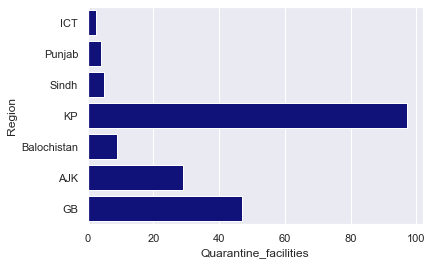

In [283]:
sns.barplot(data=sheet10,y='Region',x='Quarantine_facilities',color='darkblue',ci=None);

In [284]:
#!pip install gspread oauth2client
#!pip install gspread oauth2client df2gspread
#!pip install df2gspread

In [285]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import df2gspread as d2g

In [40]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('covid-19-277019-1de4020c825d.json', scopes=scope)
gc = gspread.authorize(credentials)
spreadsheet_key='1k3jTKzjpcdXgOZ4KIadPOMU6xhYSzoZNOE54lBAnc-g'

In [286]:
#from df2gspread import df2gspread as d2g
from df2gspread import df2gspread as d2g


In [37]:
wks_name='TimeSeries_KeyIndicators'
w=d2g.upload(sheet1, spreadsheet_key, wks_name,credentials=credentials,row_names=True)
print("Data upload success")

Data upload success


In [71]:
sheet1.to_clipboard()